In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def load_image(image_path):
    """Load an image and convert it to grayscale."""
    image = Image.open(image_path).convert('L')
    return np.array(image)

def compute_multilevel_wavelet_transform(image, wavelet='haar', level=2):
    """Compute multi-level wavelet decomposition of an image."""
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    return coeffs

In [9]:
def compute_difference(coeffs1, coeffs2):
    """Compute the difference in wavelet coefficients between two images."""
    diff_coeffs = []
    # Iterate through each level of coefficients, skipping level 0 approximation coefficients
    for level1, level2 in zip(coeffs1[1:], coeffs2[1:]):
        # Each level is a tuple (cA, (cH, cV, cD))
        cH1, cV1, cD1 = level1
        cH2, cV2, cD2 = level2
        # Compute the difference in horizontal, vertical, and diagonal details
        diff_horizontal = np.abs(cH1 - cH2)
        diff_vertical = np.abs(cV1 - cV2)
        diff_diagonal = np.abs(cD1 - cD2)
        diff_coeffs.append((diff_horizontal, diff_vertical, diff_diagonal))
    return diff_coeffs

In [13]:
def plot_wavelet_difference(image1_path, image2_path, wavelet='haar', level=2):
    """Plot the differences in multi-level wavelet transforms of two images using matplotlib."""
    # Load images
    image1 = load_image(image1_path)
    image2 = load_image(image2_path)

    # Compute multi-level wavelet decomposition
    coeffs1 = compute_multilevel_wavelet_transform(image1, wavelet, level)
    coeffs2 = compute_multilevel_wavelet_transform(image2, wavelet, level)

    # Compute differences
    diff_coeffs = compute_difference(coeffs1, coeffs2)

    # Number of rows and columns for subplot
    nrows, ncols = level, 3

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    # Adding plots for each level
    for i, (dh, dv, dd) in enumerate(diff_coeffs):
        if nrows > 1:
            ax = axes[i, 0]
            ax.imshow(dh / dh.max(), cmap='gray', aspect='auto')
            ax.set_title(f'Level {i+1} - Horizontal Diff')
            ax.axis('off')

            ax = axes[i, 1]
            ax.imshow(dv / dv.max(), cmap='gray', aspect='auto')
            ax.set_title(f'Level {i+1} - Vertical Diff')
            ax.axis('off')

            ax = axes[i, 2]
            ax.imshow(dd / dd.max(), cmap='gray', aspect='auto')
            ax.set_title(f'Level {i+1} - Diagonal Diff')
            ax.axis('off')
        else:
            axes[0].imshow(dh / dh.max(), cmap='gray', aspect='auto')
            axes[0].set_title(f'Level {i+1} - Horizontal Diff')
            axes[0].axis('off')

            axes[1].imshow(dv / dv.max(), cmap='gray', aspect='auto')
            axes[1].set_title(f'Level {i+1} - Vertical Diff')
            axes[1].axis('off')

            axes[2].imshow(dd / dd.max(), cmap='gray', aspect='auto')
            axes[2].set_title(f'Level {i+1} - Diagonal Diff')
            axes[2].axis('off')

    # Show the plot
    plt.show()

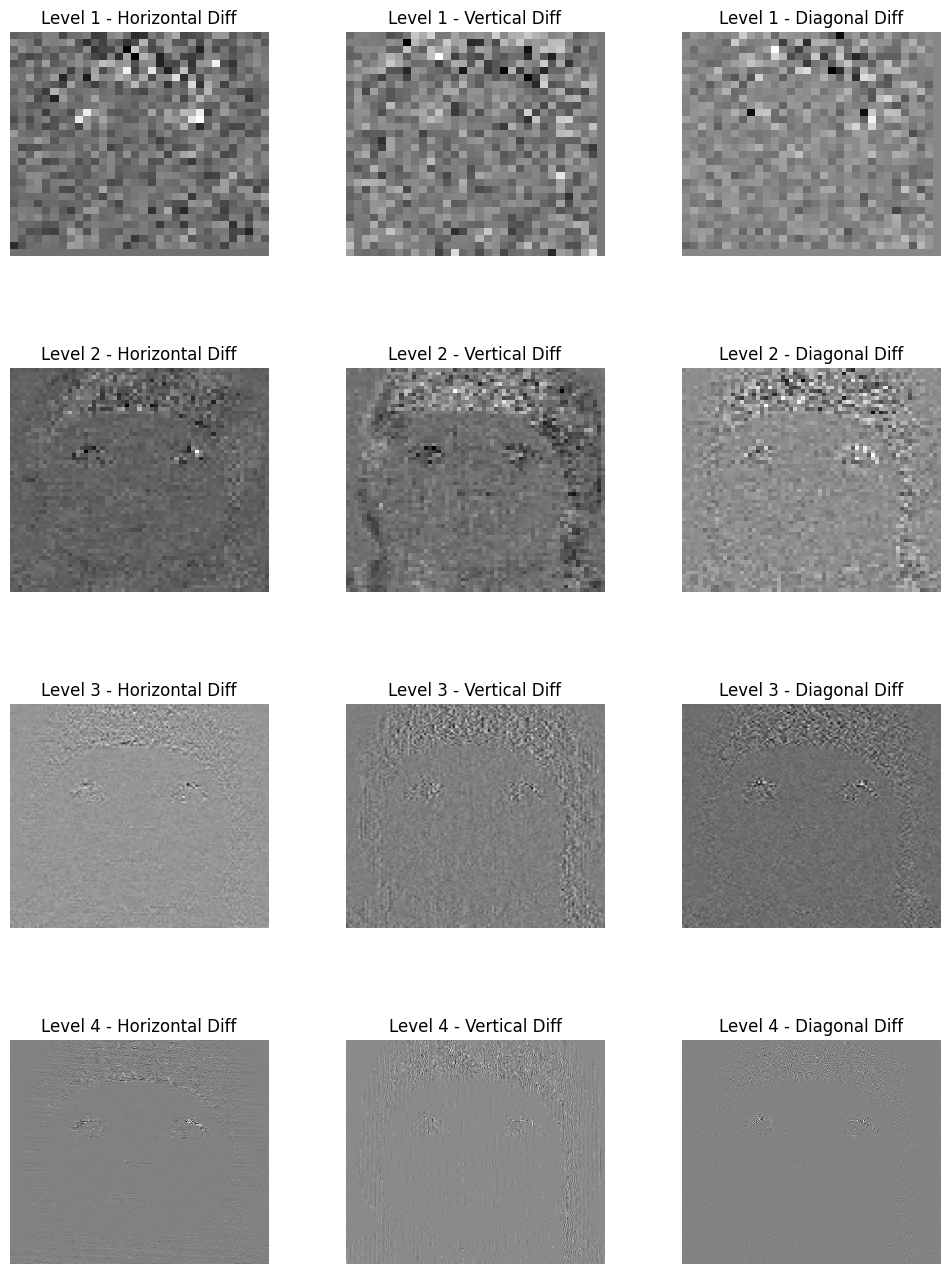

In [14]:

# Example usage
image1_path = '/home/admyyh/python_workspace/BasicSR/experiments/train_HMA_SRx2_from_DF2K_250k_smaller/visualization/baby/baby_18500.png'
image2_path = '/home/admyyh/python_workspace/BasicSR/datasets/Set5/GTmod12/baby.png'
plot_wavelet_difference(image1_path, image2_path, wavelet='haar', level=4)
